# Introduction

This notebooks demonstrate how private photo sharing are enabled for SocialFI by Mind Network. 

It is developed during StarkWare Hackathon 2023: https://the-network-state-hackathon.devfolio.co/ .

Notebooks can to show code logic and how Mind Network are integrated with other tools. 

All materials inculding Photo and name used in this demo are randomly selected from online and only for demo purpose.

Any questions or discussions are welcomed to contact hi@mindnetwork.xyz

# 0. Setup environment and config test photos

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mind_sdk import Mind
from mind_hackthon_photo import MindPhoto
from mind_hackthon_photo import *
import mind_env

mind_sdk = Mind(mind_env)
mind_photo = MindPhoto(mind_sdk)

In [3]:
fn_image_original = './face_hand_shake.jpeg'
fn_image_face_alice = 'face_cz.png'
fn_image_face_bob = './face_sbf.png'

people_id_alice = 'cz-binance.eth'
people_id_bob = 'sbf-ftx.eth'

# 1. Alice shot a photo

original photo is like this: 


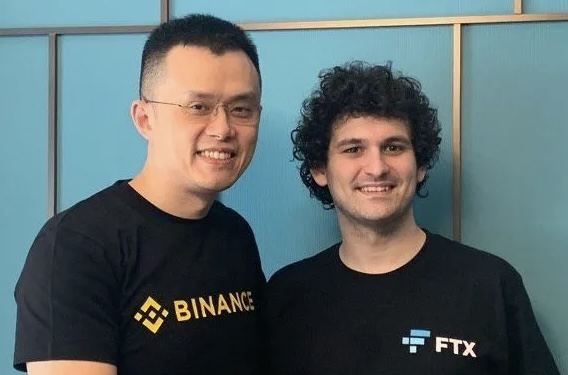

In [4]:
im = Image.open(fn_image_original)

print("original photo is like this: ")
display(im)

# 2. Alice upload original photo to Mind Network Photo Storage Dapp and return a masked photo for public sharing. All important featues, such as face recognisation, are encrypted and securelly stored in Mind Network.

In [5]:
people_id = people_id_alice
photo_uuid = mind_photo.send_photo(fn_image_original, people_id)
print("photo url in mind network: ")
print(photo_uuid)

photo url in mind network: 
3fca8aec258342ad835ef9800833c13e7e886f997039f4bf4fa8f2f119efc912


all face features are removed for public view: 


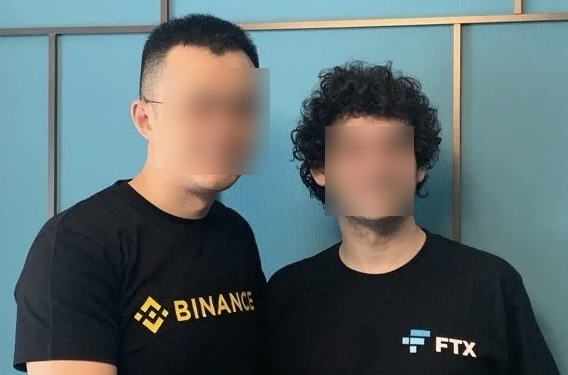

In [6]:
photo_masked = mind_photo.get_photo(photo_uuid)

print('all face features are removed for public view: ')
display(photo_masked)

# 3. Alice post masked photo to social network, e.g. twitter. Social Network only contains masked photo which have all important features are encrypted, e.g. faces are masked. 

In [7]:
people_id = people_id_alice
post_uuid = mind_photo.send_post(photo_uuid, people_id, "This is my second post in SocialFI !")

print("this is the unique post id with the photo id in mind network: ")
print(post_uuid)

this is the unique post id with the photo id in mind network: 
c46f9865bdd283509fa808d2bdf9ccc9619a8c88340c43b7a854183be75c8e72


check if the post are linked to photo


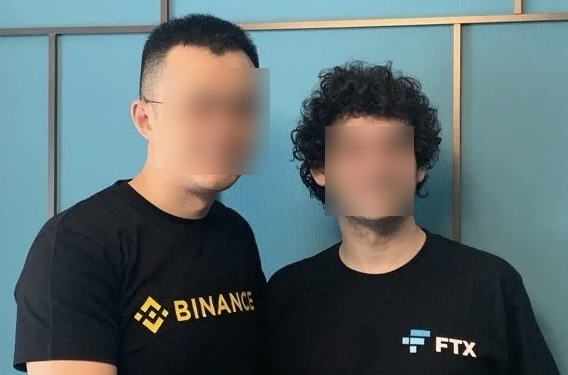

In [8]:
post_uuid, photo_uuid, people_uuid, text = mind_photo.get_post(post_uuid)

photo_masked = mind_photo.get_photo(photo_uuid)
print('check if the post are linked to photo')
display(photo_masked)

# 4.1 Alice upload private photo to Mind Cacoon to train face recognition AI

this is my selfie to train my face recognition AI: 


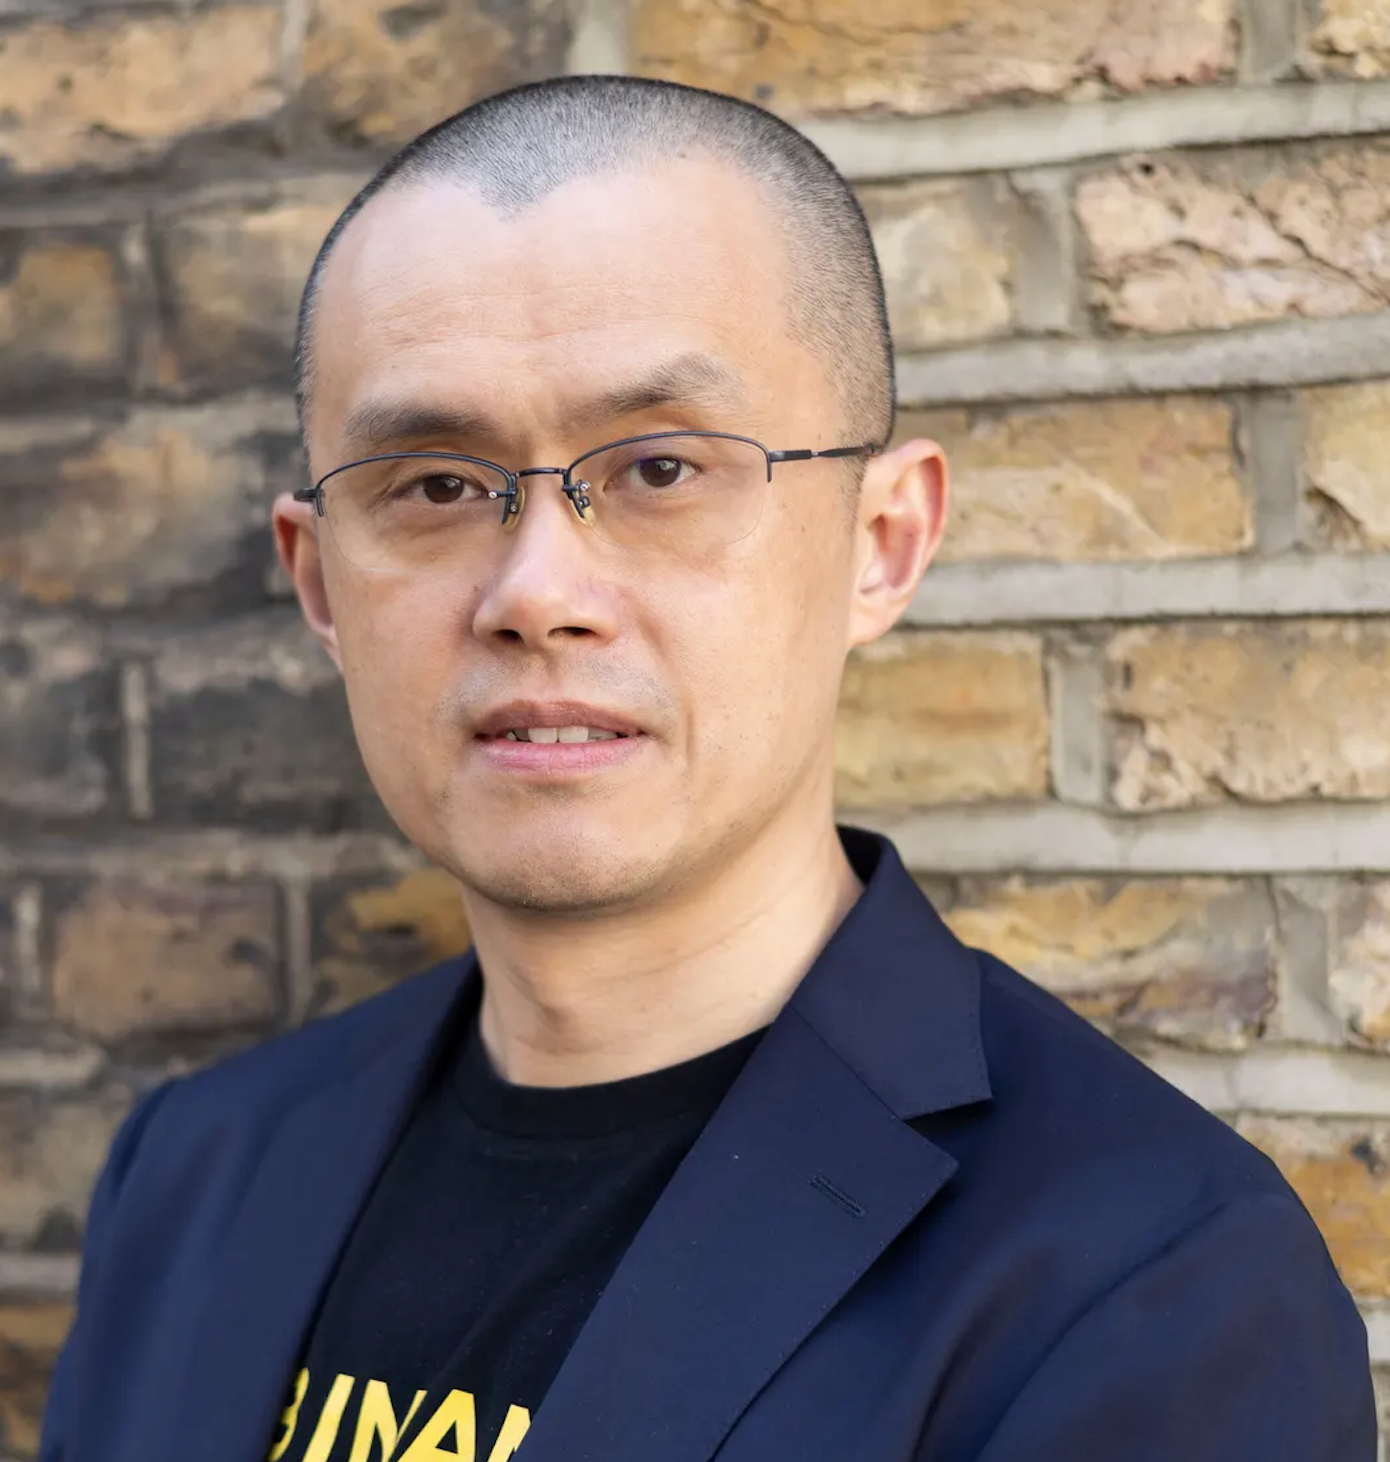

In [9]:
fn_image_face = fn_image_face_alice
people_id = people_id_alice
name = people_id
face_uuid = mind_photo.send_face(people_id, fn_image_face, name)

photo_face = mind_photo.get_face(face_uuid)
print("this is my selfie to train my face recognition AI: ")
display(photo_face)

# 4.2 Bob upload private photo to Mind Cacoon to train face recognition AI

this is my selfie to train my face recognition AI: 


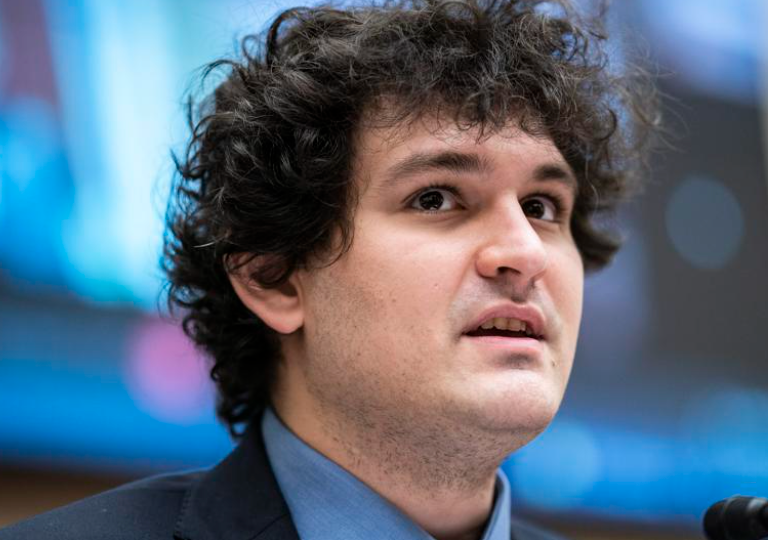

In [10]:
fn_image_face = fn_image_face_bob
people_id = people_id_bob
name = people_id
face_uuid = mind_photo.send_face(people_id, fn_image_face, name)

photo_face = mind_photo.get_face(face_uuid)
print("this is my selfie to train my face recognition AI: ")
display(photo_face)

# 5. SocialFI and DID can work out their relationship to decide on how to unmask faces 

In [11]:
did = DID()
friends = did.get_friends(people_id_alice)

print("find a social group: ")
print(friends)

#known_face_encodings, known_face_names = mind_photo.get_face_encodings(friends)
#print(known_face_encodings)

find a social group: 
['cz-binance.eth', 'sbf-ftx.eth', 'zac']


# 6. To unmask faces on shared photo based on social relationship

I can see my friends' faces if authed: 


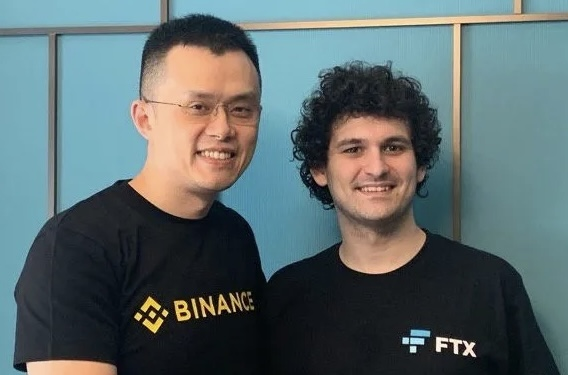

In [12]:
image_unmasked_faces = mind_photo.unmask_faces(photo_uuid, friends)

print("I can see my friends' faces if authed: ")
display(image_unmasked_faces)

# 6.2 To unmask face on shared photo on relationship and even tag identity

I can see my friends' faces and their name if authed: 


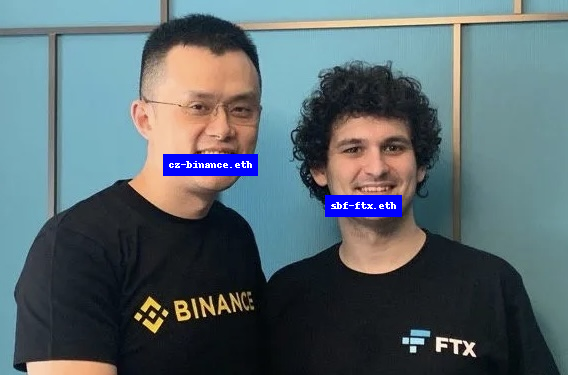

In [13]:
image_unmasked_faces_with_names = mind_photo.unmask_faces_and_tag_names(photo_uuid, friends)

print("I can see my friends' faces and their name if authed: ")
display(image_unmasked_faces_with_names)

# 7. If one friendship is broken or revoked, I can not see his face anymore. 

['cz-binance.eth', 'zac']
If one friend decide to unfriend me, I can not see his face anymore 


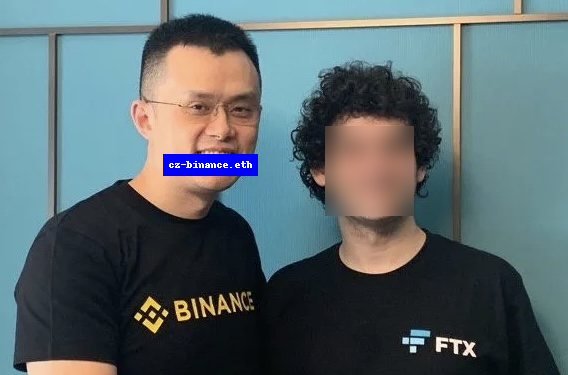

In [14]:
friends.remove(people_id_bob)
print(friends)

image_unmasked_faces_with_names = mind_photo.unmask_faces_and_tag_names(photo_uuid, friends)

print("If one friend decide to unfriend me, I can not see his face anymore ")
display(image_unmasked_faces_with_names)

# 8. the end